In [714]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [715]:
# Reading the train and test data
import os
import numpy as np
import pandas as pd
os.chdir(r"C:\Users\pdrva\Desktop\Divya\INSOFE\MitH Preperation")
data=pd.read_csv("Churn_Modelling.csv")
#test=pd.read_csv("TestData.csv")

In [716]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [717]:
#test.head()

In [718]:
data.shape

(10000, 14)

In [719]:
#test.shape

In [720]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,"No of NAs":data.isna().sum(),"No of Levels":data.apply(lambda x: x.nunique(),axis=0),"Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [721]:
# Understanding train data
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
RowNumber,int64,0,10000,[1 2 3 ... 9998 9999 10000]
CustomerId,int64,0,10000,[15634602 15647311 15619304 ... 15584532 15682...
Surname,object,0,2932,['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Ald...
CreditScore,int64,0,460,[619 608 502 699 850 645 822 376 501 684 528 4...
Geography,object,0,3,['France' 'Spain' 'Germany']
Gender,object,0,2,['Female' 'Male']
Age,int64,0,70,[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 ...
Tenure,int64,0,11,[2 1 8 7 4 6 3 10 5 9 0]
Balance,float64,0,6382,[0.0 83807.86 159660.8 ... 57369.61 75075.31 1...
NumOfProducts,int64,0,4,[1 3 2 4]


In [722]:
# Understanding train data
#understand_data(test)

In [723]:
def total_NAs(data) :
    print ("Total NAs:",data.isna().sum().sum())

In [724]:
# Check total NAs in train data
total_NAs(data)

Total NAs: 0


In [725]:
# Check total NAs in test data
#total_NAs(test)

In [726]:
# Check the summary statistics of train data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000,NaN,NaN,NaN,5000.5,2886.9,1,2500.75,5000.5,7500.25,10000
CustomerId,10000,NaN,NaN,NaN,1.56909e+07,71936.2,1.55657e+07,1.56285e+07,1.56907e+07,1.57532e+07,1.58157e+07
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4


In [727]:
# Check the summary statistics of test data
#test.describe(include='all').T

In [728]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Class imbalance in the train data')

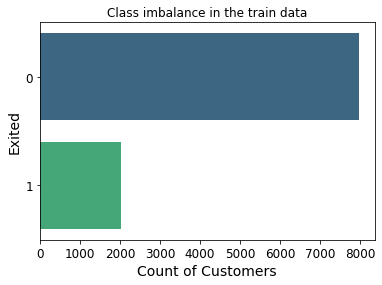

In [729]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plot to Showcase the Class imbalance for Exited(Yes/No)
sns.countplot(y=data['Exited'],palette='viridis')
plt.xlabel('Count of Customers')
plt.title('Class imbalance in the train data')

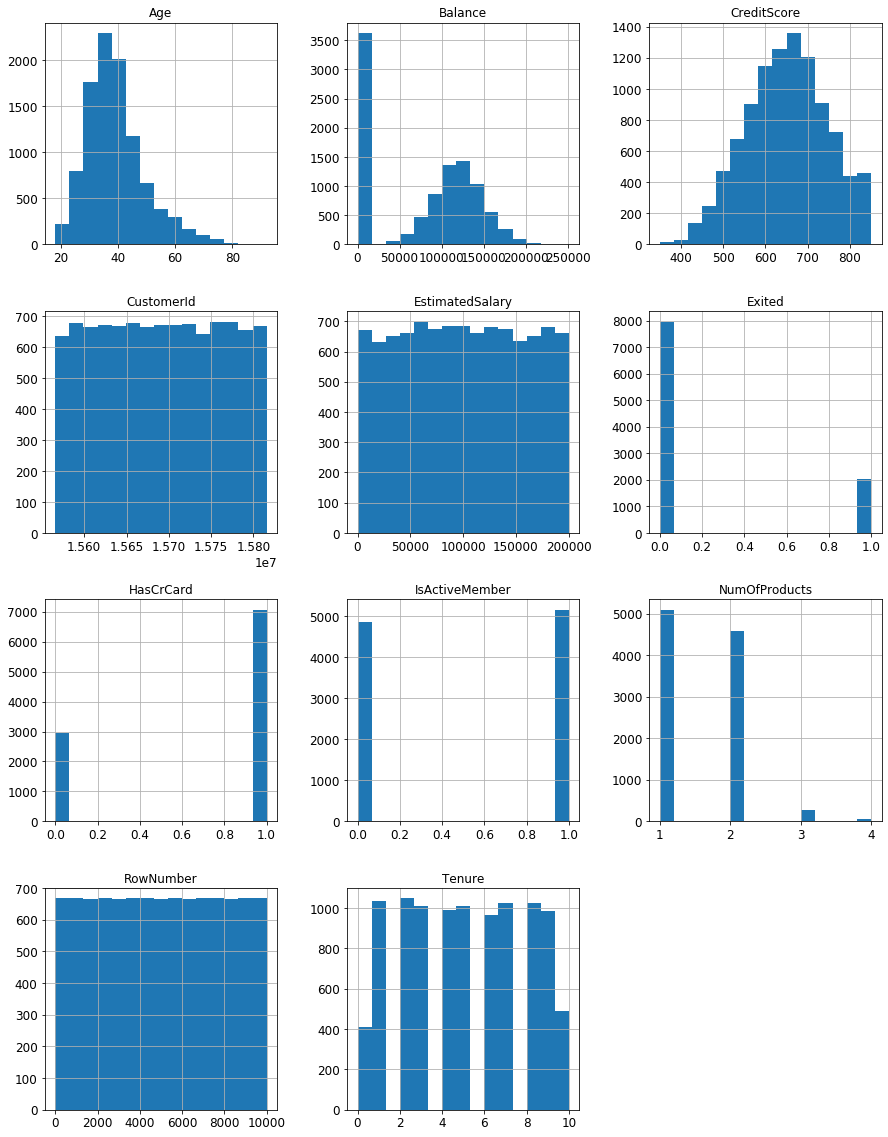

In [730]:
# Check the distribution of all the columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax, bins = 15)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

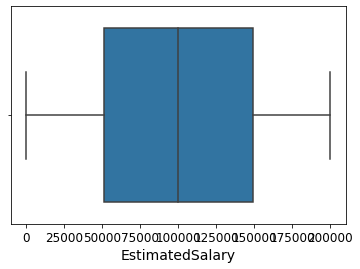

In [731]:
# Check for any outliers through boxplot for the attribute EstimatedSalary
sns.boxplot('EstimatedSalary', data = data)
# Note that there are no outliers for EstimatedSalary

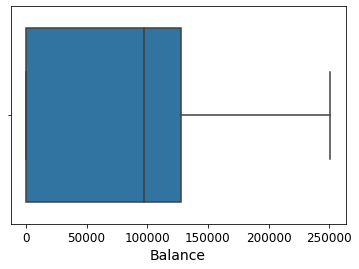

In [732]:
# Check for any outliers through boxplot for the attribute Balance
sns.boxplot('Balance', data = data)
# Note that there are no outliers for Balance

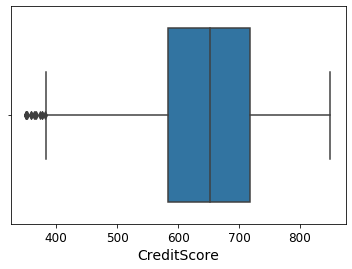

In [733]:
# Check for any outliers through boxplot for the attribute CreditScore
sns.boxplot('CreditScore', data = data)
# There are few outliers for CreditScore

In [734]:
# split predictors and target
traindata_x=data.drop(['Exited'],axis=1)
traindata_y=pd.DataFrame(data['Exited'])
print(traindata_x.columns);print(traindata_y.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['Exited'], dtype='object')


In [735]:
# Split train and validation data
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(traindata_x,traindata_y,test_size=0.2,random_state=42)
print(train_x.shape)
print(val_x.shape)
print(train_y.shape)
print(val_y.shape)

(8000, 13)
(2000, 13)
(8000, 1)
(2000, 1)


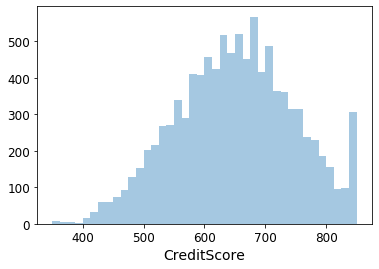

In [736]:
sns.distplot(data["CreditScore"],kde = False, bins = 40 )

In [737]:
# Convert the required columns to categorical.

In [738]:
def convert_obj_categ(data) :
    categ_cols=data.select_dtypes(include='object').columns
    for i in categ_cols :
        data[categ_cols]=data[categ_cols].astype('str').astype('category')
    print (data.select_dtypes(include='category').columns, "columns are converted to categorical")

In [739]:
convert_obj_categ(train_x)

Index(['Surname', 'Geography', 'Gender'], dtype='object') columns are converted to categorical


In [740]:
convert_obj_categ(val_x)

Index(['Surname', 'Geography', 'Gender'], dtype='object') columns are converted to categorical


In [741]:
#convert_obj_categ(test)

In [742]:
# The attributes HasCrCard and IsActiveMember are ordinal. Since they are already label encoded we can leave them as it is.
print(train_x.HasCrCard.value_counts());print(train_x.IsActiveMember.value_counts())

1    5628
0    2372
Name: HasCrCard, dtype: int64
1    4102
0    3898
Name: IsActiveMember, dtype: int64


In [743]:
train_y.Exited.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [744]:
def drop_constant_cols(data) :
    const_cols=[]
    for i in data.columns :
        if data[i].nunique()<2 :
            const_cols.append(i)
    print("Deleting constant columns", const_cols)
    data.drop(const_cols,axis=1,inplace=True)

In [745]:
drop_constant_cols(train_x)

Deleting constant columns []


In [746]:
drop_constant_cols(val_x)

Deleting constant columns []


In [747]:
#drop_constant_cols(test)

In [748]:
def bin_age(data) :
    for i in range(data.shape[0]):
        if data.Age.iloc[i] < 20 :
            data['Age'].iloc[i] = "0-20"
        elif data.Age.iloc[i] < 30 :
            data['Age'].iloc[i] = "20-30"
        elif data.Age.iloc[i] < 40 :
            data['Age'].iloc[i] = "30-40"
        elif data.Age.iloc[i] < 50 :
            data['Age'].iloc[i] = "40-50"
        elif data.Age.iloc[i] < 60 :
            data['Age'].iloc[i] = "50-60"
        elif data.Age.iloc[i] < 70 :
            data['Age'].iloc[i] = "60-70"
        else :
            data['Age'].iloc[i] = "70-100"

In [749]:
bin_age(train_x)
bin_age(val_x)

In [750]:
convert_num_categ(train_x,'Age')

Index(['Surname', 'Geography', 'Gender', 'Age'], dtype='object') columns are converted to categorical


In [751]:
convert_num_categ(val_x,'Age')

Index(['Surname', 'Geography', 'Gender', 'Age'], dtype='object') columns are converted to categorical


In [752]:
#bin_age(train_x)
train_x.Age.value_counts()

30-40     3484
40-50     2062
20-30     1290
50-60      699
60-70      298
70-100     127
0-20        40
Name: Age, dtype: int64

In [753]:
#bin_age(val_x)
val_x.Age.value_counts()

30-40     862
40-50     556
20-30     302
50-60     170
60-70      77
70-100     24
0-20        9
Name: Age, dtype: int64

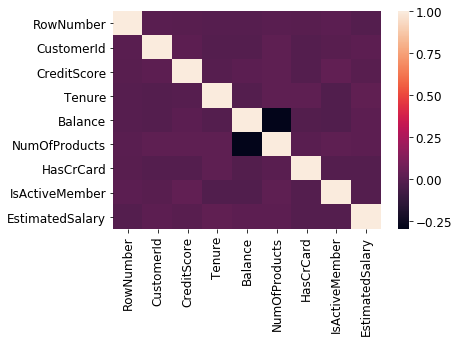

In [754]:
corr = train_x.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# TotalNoOfUnits and NoOfResidentialUnits are highly correlated. Looks like the same information is available in both the columns.
# So, it makes sense to drop NoOfResidentialUnits and retain TotalNoOfUnits.
# Based on domain understanding we can also drop NoOfCommercialUnits and retain TotalNoOfUnits.

In [355]:
corr

,RowNumber,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,1.000000,0.002421,-0.003135,-0.004378,-0.008076,0.002375,-0.000403,0.010064,-0.011891
CustomerId,0.002421,1.000000,0.013950,-0.010792,-0.012780,0.017027,-0.010133,-0.002038,0.015607
CreditScore,-0.003135,0.013950,1.000000,-0.007670,0.006758,0.019402,-0.013145,0.028217,-0.002628
Tenure,-0.004378,-0.010792,-0.007670,1.000000,-0.011748,0.018448,0.020439,-0.023162,0.022071
Balance,-0.008076,-0.012780,0.006758,-0.011748,1.000000,-0.297601,-0.015655,-0.022086,0.011984
NumOfProducts,0.002375,0.017027,0.019402,0.018448,-0.297601,1.000000,0.003504,0.019543,0.013162
HasCrCard,-0.000403,-0.010133,-0.013145,0.020439,-0.015655,0.003504,1.000000,-0.011913,-0.012799
IsActiveMember,0.010064,-0.002038,0.028217,-0.023162,-0.022086,0.019543,-0.011913,1.000000,-0.009852
EstimatedSalary,-0.011891,0.015607,-0.002628,0.022071,0.011984,0.013162,-0.012799,-0.009852,1.000000


In [755]:
train_x.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [756]:
def drop_unimp_cols(data) :
    unimp_cols=['RowNumber','CustomerId','Surname']
    print("Deleting unimportant columns", unimp_cols)
    data.drop(unimp_cols,axis=1,inplace=True)

In [757]:
drop_unimp_cols(train_x)

Deleting unimportant columns ['RowNumber', 'CustomerId', 'Surname']


In [758]:
drop_unimp_cols(val_x)

Deleting unimportant columns ['RowNumber', 'CustomerId', 'Surname']


In [759]:
#drop_unimp_cols(test)

In [760]:
# Concatinate predictors and target variable
traindata=pd.concat([train_x,train_y],axis=1)
traindata.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,686,France,Male,30-40,6,0.0,2,1,1,179093.26,0


In [761]:
# Taking backup of preprocessed data.
traindata_backup=traindata.copy()
train_x_backup=train_x.copy()
train_y_backup=train_y.copy()
val_x_backup=val_x.copy()
val_y_backup=val_y.copy()
#test_backup=test.copy()

In [762]:
understand_data(train_x)

,Datatype,No of NAs,No of Levels,Levels
CreditScore,int64,0,457,[686 632 559 561 517 569 683 759 426 601 735 6...
Geography,category,0,3,"[France, Germany, Spain]\nCategories (3, objec..."
Gender,category,0,2,"[Male, Female]\nCategories (2, object): [Male,..."
Age,category,0,7,"[30-40, 40-50, 20-30, 50-60, 70-100, 60-70, 0-..."
Tenure,int64,0,11,[ 6 4 3 9 1 8 2 5 7 10 0]
Balance,float64,0,5082,[ 0. 119624.6 114739.92 ... 69712.74 1...
NumOfProducts,int64,0,4,[2 1 3 4]
HasCrCard,int64,0,2,[1 0]
IsActiveMember,int64,0,2,[1 0]
EstimatedSalary,float64,0,7999,[179093.26 195978.86 85891.02 ... 92220.12 ...


##### EDA

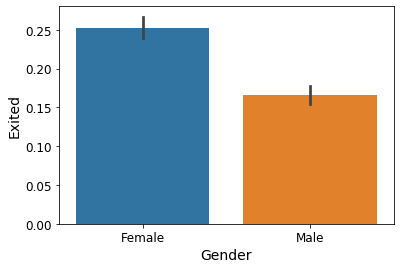

In [763]:
# Bar Chart to analyse the relationship between Gender and Churn
sns.barplot(y = "Exited", x = "Gender", data = traindata)

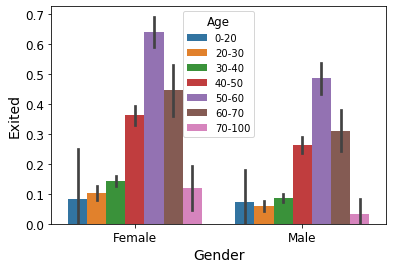

In [767]:
# Bar Chart to analyse the relationship between Gender,Age and Churn
sns.barplot(y = "Exited", x = "Gender", data = traindata,hue='Age')
# Looks like verterans amongst both male and female are more likely to stay; they are not likely to churn.
# Where as young and early middle age people between 20-40 are more likely to exit; they are likely to churn.
# So, inorder to reduce churn ratio company has to market products and comeup with business strategies that attract young people.

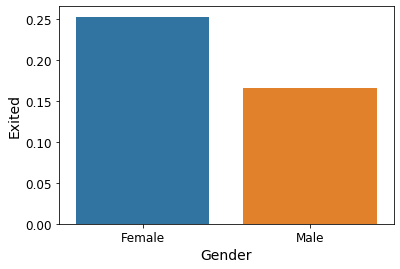

In [768]:
# This itself isn't accurate. Because, we haven't plotted the average churn ration in male and female. Let us do that
refined_gender_data=traindata.groupby('Gender')['Exited'].mean()
sns.barplot(y=refined_gender_data,x=refined_gender_data.index)

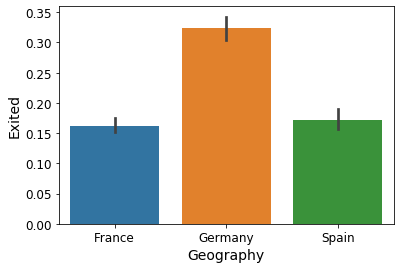

In [766]:
# Bar Chart to analyse the relationship between Gerography type and churn.
sns.barplot(y = "Exited", x = "Geography", data = traindata)

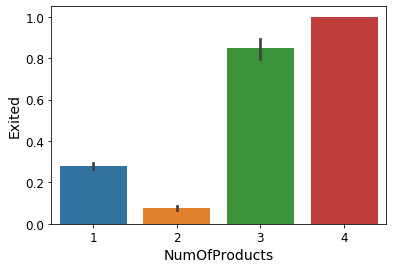

In [769]:
# Bar Chart to analyse the relationship between Gerography type and churn.
sns.barplot(y = "Exited", x = "NumOfProducts", data = traindata)
# People using more Number Of Products are less likely to churn than people who use less no of products.
# So, the company should focus on promorting more of its products to customers.

In [396]:
traindata.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

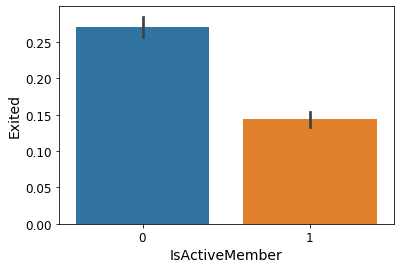

In [771]:
# Bar Chart to analyse the relationship between IsActiveMember category and churn
sns.barplot(y = "Exited", x = "IsActiveMember", data = traindata)
# Active members are less likely to leave than inactive members. By checking the activity of a member the company can very well 
# estimate that the customer is not very happy and he is likely to exit in near future. Understanding which customers are
# inactive might help the company reach out to them and provide better interactive services inorder to retain them and convert
# them as loyal customers.

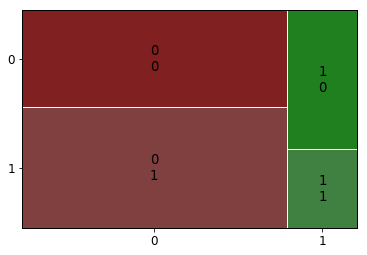

In [772]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(traindata, ['Exited', 'IsActiveMember']);
# By looking at this chart we understand that more of Active members are staying while more of Inactive members are exiting.

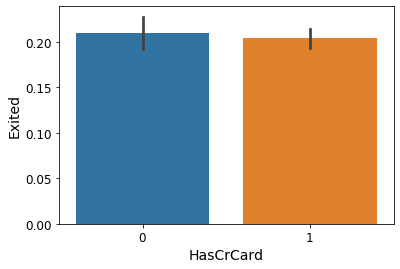

In [775]:
import matplotlib.pyplot as plt
# Bar Chart to analyse the relationship between HasCrCard category and churn
sns.barplot(y = "Exited", x = "HasCrCard", data = traindata)
# There looks a very small difference in churn ratio between customers who has cc and who doesnt. So, the company may not
# utilize much of its resources to improve customer credit card usage.

Text(0.5, 1.0, 'Credit Card having to Churn comparison')

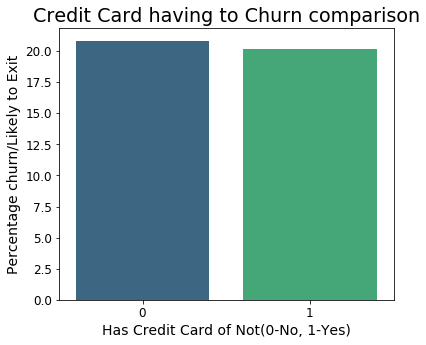

In [776]:
plt.figure(figsize=(6,5))
#calulations to understand churn percentage based on the Customer having Credit card
data_churn=data[data['Exited']==1].groupby(['HasCrCard'])['CustomerId'].count().reset_index()
data_total=data.groupby(['HasCrCard'])['CustomerId'].count().reset_index()
data_churn=pd.merge(data_churn,data_total,on='HasCrCard',how='inner')
data_churn['Perc_churn']=(data_churn['CustomerId_x']/data_churn['CustomerId_y'])*100
sns.barplot(x='HasCrCard',y='Perc_churn',data=data_churn,palette='viridis')
plt.xlabel('Has Credit Card of Not(0-No, 1-Yes)')
plt.ylabel('Percentage churn/Likely to Exit')
plt.title('Credit Card having to Churn comparison')
#Findings - we only see 2-3% churn difference betwen users having creadit cards and those who doesn't.

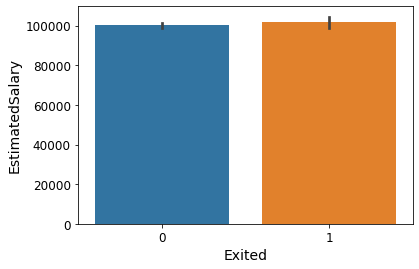

In [777]:
# scatterplot to analyse the relationship between EstimatedSalary and churn
sns.barplot(y ='EstimatedSalary', x = 'Exited', data = traindata)

Text(0.5, 1.0, 'Estimated Salary and Churn comparison')

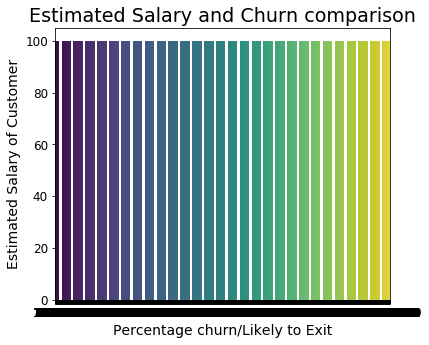

In [780]:
plt.figure(figsize=(6,5))
#calulations to understand churn percentage based on the EstimatedSalary of Customer.
data_churn=data[data['Exited']==1].groupby(['EstimatedSalary'])['CustomerId'].count().reset_index()
data_total=data.groupby(['EstimatedSalary'])['CustomerId'].count().reset_index()
data_churn=pd.merge(data_churn,data_total,on='EstimatedSalary',how='inner')
data_churn['Perc_churn']=(data_churn['CustomerId_x']/data_churn['CustomerId_y'])*100
sns.barplot(x='EstimatedSalary',y='Perc_churn',data=data_churn,palette='viridis')
plt.xlabel('Percentage churn/Likely to Exit')
plt.ylabel('Estimated Salary of Customer')
plt.title('Estimated Salary and Churn comparison')
#Findings - we only see 2-3% churn difference betwen users having creadit cards and those who doesn't.

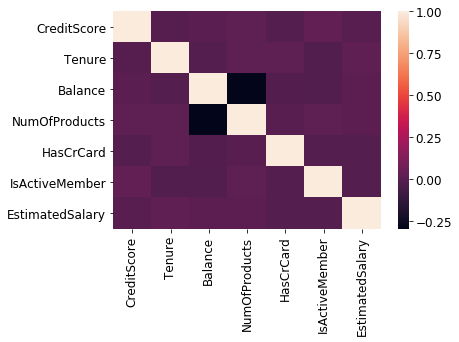

In [781]:
corr = train_x.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# Looks like Surroundings and ZipCode are correlated. 
# They should be further analysed and one of them can be dropped and other can be retained.

In [782]:
cat_new_cols=train_x.select_dtypes(include='category').columns

In [783]:
train_x = pd.get_dummies(train_x,columns= cat_new_cols, drop_first=True)
val_x = pd.get_dummies(val_x,columns= cat_new_cols, drop_first=True)
#test = pd.get_dummies(test,columns= cat_new_cols, drop_first=True)

In [784]:
train_x.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-100
9254,686,6,0.00,2,1,1,179093.26,0,0,1,0,1,0,0,0,0
1561,632,4,119624.60,2,1,1,195978.86,1,0,1,0,0,1,0,0,0
1670,559,3,114739.92,1,1,0,85891.02,0,1,1,1,0,0,0,0,0
6087,561,9,135637.00,1,1,0,153080.40,0,0,0,1,0,0,0,0,0
6669,517,9,142147.32,1,0,0,39488.04,0,0,1,0,0,0,1,0,0


In [785]:
num_new_cols=train_x.select_dtypes(include=['int64','float64']).columns

In [786]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x[num_new_cols])

train_x[num_new_cols] =scaler.transform(train_x[num_new_cols])
val_x[num_new_cols] =scaler.transform(val_x[num_new_cols])
#test[num_new_cols] =scaler.transform(test[num_new_cols])

In [798]:
# Model Building
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
reg1 = LogisticRegressionCV()
# Fit the data on train
reg1.fit(train_x, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [799]:
# Predict
train_pred1 = reg1.predict(train_x)
val_pred1 = reg1.predict(val_x)

In [800]:
# Model evaluation
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_curve,confusion_matrix
confusion_matrix_train1 = confusion_matrix(train_y, train_pred1)
confusion_matrix_val1 = confusion_matrix(val_y, val_pred1)

Text(0.5, 1, 'Logistic Regression Recall Score Train: 0.28771289537712896')

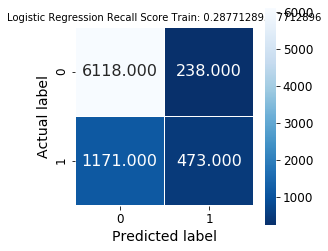

In [801]:
# Confusion matrix for Logistic Regression Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Recall Score Train: {}'.format((recall_score(train_y, train_pred1)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'Logistic Regression Recall Score Val: 0.30788804071246817')

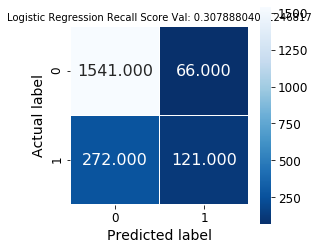

In [802]:
# Confusion matrix for Logistic Regression Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Recall Score Val: {}'.format((recall_score(val_y, val_pred1)))
plt.title(all_sample_title, size = 10)

In [803]:
print("Train Accuracy",accuracy_score(train_y,pred_train1))
print("Train Recall",recall_score(train_y, pred_train1, pos_label=1))
print("Train Specificity",recall_score(train_y, pred_train1,pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred1))
print("Val Recall",recall_score(val_y, val_pred1, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred1,pos_label=0))

Train Accuracy 0.823875
Train Recall 0.28771289537712896
Train Specificity 0.9625550660792952
Val Accuracy 0.831
Val Recall 0.30788804071246817
Val Specificity 0.9589296826384568


In [804]:
# Model building
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier(random_state=1,class_weight='balanced',max_depth=7)
#Fit the data on train
%time clf1.fit(train_x, train_y)

Wall time: 28.4 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [805]:
# Predict
train_pred2 = clf1.predict(train_x)
val_pred2 = clf1.predict(val_x)

In [806]:
# Model evaluation
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_curve,confusion_matrix
confusion_matrix_train2 = confusion_matrix(train_y, train_pred2)
confusion_matrix_val2 = confusion_matrix(val_y, val_pred2)

Text(0.5, 1, 'Logistic Regression Recall Score Train: 0.8266423357664233')

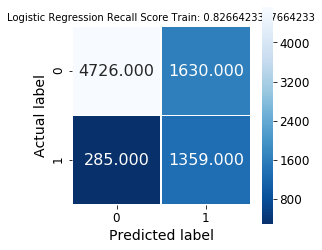

In [807]:
# Confusion matrix for Weight Balanced DT Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Weight Balanced DT Recall Score Train: {}'.format((recall_score(train_y, train_pred2)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'Logistic Regression Recall Score Val: 0.7659033078880407')

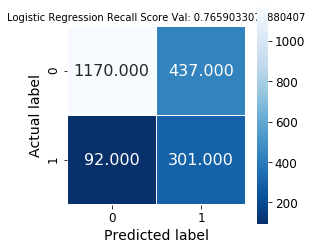

In [808]:
# Confusion matrix for Weight Balanced DT Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Weight Balanced DT Recall Score Val: {}'.format((recall_score(val_y, val_pred2)))
plt.title(all_sample_title, size = 10)

In [820]:
print("Train Accuracy",accuracy_score(train_y,pred_train2))
print("Train Recall",recall_score(train_y, pred_train2, pos_label=1))
print("Train Specificity",recall_score(train_y, pred_train2,pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred2))
print("Val Recall",recall_score(val_y, val_pred2, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred2,pos_label=0))

Train Accuracy 1.0
Train Recall 1.0
Train Specificity 1.0
Val Accuracy 0.7355
Val Recall 0.7659033078880407
Val Specificity 0.7280647168637212


In [850]:
# Get the information of important variables that can help accurate classify the customers as to who are likely to exit and 
# who are not.
importances=clf1.feature_importances_
print(importances)
print(train_x.columns)
# numpy.argsort() is used to perform a sort on input array and returns an array of indices. when the kind keyword is specified 
# an indirect sort along the given axis using the algorithm specified by the kind keyword is performed.
# syntax: numpy.argsort(arr, axis=-1, kind=’quicksort’, order=None) Here ::-1 sorts in descending order of importance.
indices = np.argsort(importances)[::-1]
print(indices) # Prints original column indexes in sorted descending order of importance.
names=np.asarray(train_x.columns[indices])
print(names) # Gives an ndarray of variables in the order of importance
Important=pd.DataFrame(np.sort(importances)[::-1],index=names,columns=['Imp'])
print(Important) # Gives a DF of variables as index and their respective importance as column in the desc order of importance.

[0.01299546 0.00994872 0.11999459 0.33027859 0.00260643 0.05829313
 0.01864342 0.04560635 0.00466734 0.0091308  0.00227298 0.
 0.16355521 0.17554212 0.04646485 0.        ]
Index(['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Age_20-30', 'Age_30-40', 'Age_40-50',
       'Age_50-60', 'Age_60-70', 'Age_70-100'],
      dtype='object')
[ 3 13 12  2  5 14  7  6  0  1  9  8  4 10 15 11]
['NumOfProducts' 'Age_50-60' 'Age_40-50' 'Balance' 'IsActiveMember'
 'Age_60-70' 'Geography_Germany' 'EstimatedSalary' 'CreditScore' 'Tenure'
 'Gender_Male' 'Geography_Spain' 'HasCrCard' 'Age_20-30' 'Age_70-100'
 'Age_30-40']
                        Imp
NumOfProducts      0.330279
Age_50-60          0.175542
Age_40-50          0.163555
Balance            0.119995
IsActiveMember     0.058293
Age_60-70          0.046465
Geography_Germany  0.045606
EstimatedSalary    0.018643
CreditScore 

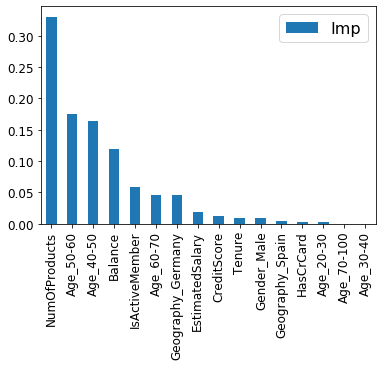

In [848]:
### Plotting the features in descending order of importances
Important.plot(kind='bar')

In [860]:
import os
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from sklearn.tree import export_graphviz

In [861]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [862]:
def plottree(m1):
    labels=train_x.columns
    graph = Source(export_graphviz(m1, out_file=None,feature_names=labels, class_names=['No', 'Yes',] ,filled = True))
    display(SVG(graph.pipe(format='svg')))

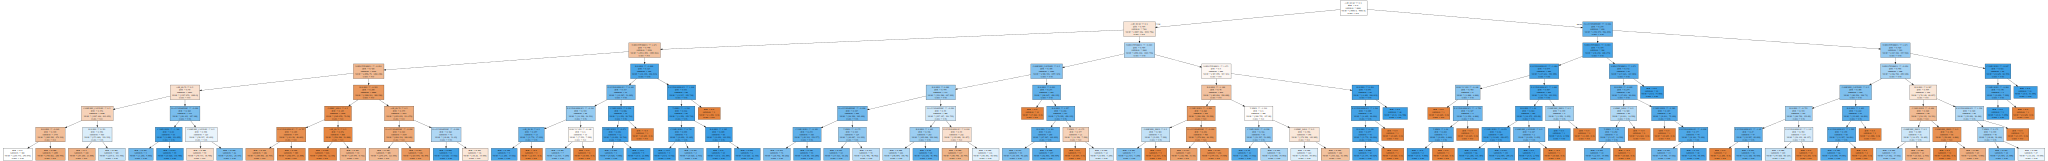

In [863]:
# Visualize the tree
plottree(clf1)

In [821]:
# Model Building
from sklearn.model_selection import RandomizedSearchCV
clf_grid=DecisionTreeClassifier(random_state=2,class_weight='balanced')
dt_param_grid = {"min_samples_leaf": [2,3,5,7,10],
              "max_depth": [3,5,7,9],
              "criterion":['entropy']}
clf2 = RandomizedSearchCV(clf_grid,dt_param_grid,cv=10,scoring='recall',refit='recall',n_jobs=-1,n_iter=100)
# Fitting
%time clf2.fit(train_x,train_y)
print(clf2.best_score_,clf2.best_params_)

Wall time: 8.96 s
0.7384220251293422 {'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'entropy'}


In [815]:
# Predict
train_pred3 = clf2.predict(train_x)
val_pred3 = clf2.predict(val_x)

In [816]:
# Model evaluation
confusion_matrix_train3 = confusion_matrix(train_y, train_pred3)
confusion_matrix_val3 = confusion_matrix(val_y, val_pred3)

Text(0.5, 1, 'Grid DT Recall Score Train: 0.7615571776155717')

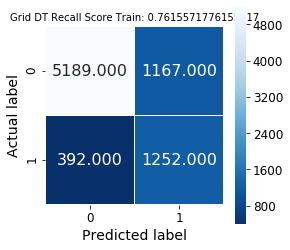

In [817]:
# Confusion matrix for Grid DT Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Grid DT Recall Score Train: {}'.format((recall_score(train_y, train_pred3)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'Grid DT Recall Score Val: 0.712468193384224')

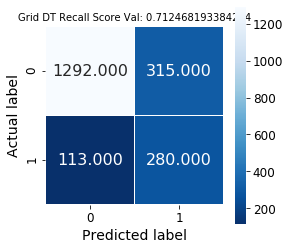

In [818]:
# Confusion matrix for Grid DT Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Grid DT Recall Score Val: {}'.format((recall_score(val_y, val_pred3)))
plt.title(all_sample_title, size = 10)

In [819]:
print("Train Accuracy",accuracy_score(train_y,train_pred3))
print("Train Recall",recall_score(train_y,train_pred3, pos_label=1))
print("Train Specificity",recall_score(train_y,train_pred3,pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred3))
print("Val Recall",recall_score(val_y, val_pred3, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred3,pos_label=0))

Train Accuracy 0.805125
Train Recall 0.7615571776155717
Train Specificity 0.8163939584644431
Val Accuracy 0.786
Val Recall 0.712468193384224
Val Specificity 0.8039825762289982


In [864]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=3)
# Fitting
rf1.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [865]:
# Predict
train_pred4 = rf1.predict(train_x)
val_pred4 = rf1.predict(val_x)

In [866]:
# model evaluation
confusion_matrix_train4 = confusion_matrix(train_y, train_pred4)
confusion_matrix_val4 = confusion_matrix(val_y, val_pred4)

Text(0.5, 1, 'Logistic Regression Recall Score Train: 1.0')

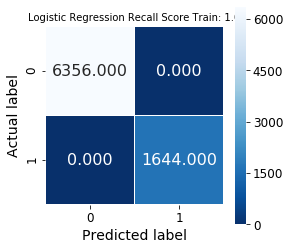

In [867]:
# Confusion matrix for basic Random Forest Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Recall Score Train: {}'.format((recall_score(train_y, train_pred4)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'Random Forest Recall Score Val: 0.455470737913486')

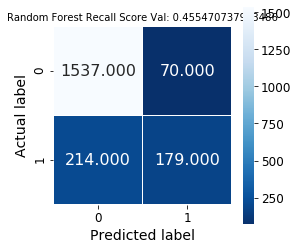

In [877]:
# Confusion matrix for basic Random Forest Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Recall Score Val: {}'.format((recall_score(val_y, val_pred4)))
plt.title(all_sample_title, size = 10)

In [878]:
print("Train Accuracy",accuracy_score(train_y,train_pred4))
print("Train Recall",recall_score(train_y,train_pred4, pos_label=1))
print("Train Specificity",recall_score(train_y,train_pred4,pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred4))
print("Val Recall",recall_score(val_y, val_pred4, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred4,pos_label=0))

Train Accuracy 1.0
Train Recall 1.0
Train Specificity 1.0
Val Accuracy 0.858
Val Recall 0.455470737913486
Val Specificity 0.9564405724953329


In [871]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rf_grid = RandomForestClassifier(random_state=4)
rf_param_grid = {"n_estimators" : [2,4,6,8,10],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
rf2=RandomizedSearchCV(rf_grid,rf_param_grid,cv=10,scoring='recall',refit='recall',n_jobs=-1,n_iter=1000)
# Fitting
%time rf2.fit(train_x,train_y)
print(rf2.best_score_,rf2.best_params_)

Wall time: 31.6 s
0.46713599408721357 {'n_estimators': 8, 'min_samples_leaf': 2, 'max_depth': 15}


In [879]:
# Predict
pred_train5 = rf2.predict(train_x)
pred_val5 = rf2.predict(val_x)

In [880]:
# model evaluation
confusion_matrix_train5 = confusion_matrix(train_y, train_pred5)
confusion_matrix_val5 = confusion_matrix(val_y, val_pred5)

Text(0.5, 1, 'Random Forest Grid Recall Score Train: 0.8266423357664233')

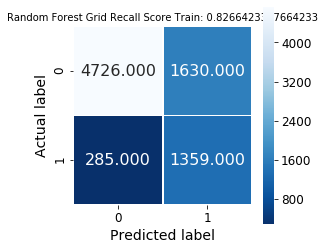

In [881]:
# Confusion matrix for Grid Random Forest Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Grid Recall Score Train: {}'.format((recall_score(train_y, train_pred5)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'Random Forest Grid Recall Score Val: 0.7659033078880407')

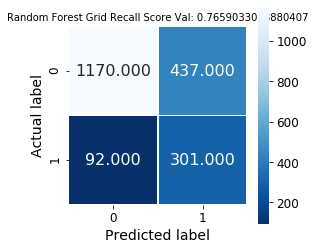

In [882]:
# Confusion matrix for Grid Random Forest Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Grid Recall Score Val: {}'.format((recall_score(val_y, val_pred5)))
plt.title(all_sample_title, size = 10)

In [883]:
print("Train Accuracy",accuracy_score(train_y,pred_train5))
print("Train Recall",recall_score(train_y, pred_train5, pos_label=1))
print("Train Specificity",recall_score(train_y, pred_train5,pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred5))
print("Val Recall",recall_score(val_y, val_pred5, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred5,pos_label=0))

Train Accuracy 0.927
Train Recall 0.6928223844282239
Train Specificity 0.9875707992448081
Val Accuracy 0.7355
Val Recall 0.7659033078880407
Val Specificity 0.7280647168637212


In [884]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
gbc_grid=GradientBoostingClassifier(random_state=6)
gbc_param_grid = {"n_estimators" : [2,4,6,8,10],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
gbc1=RandomizedSearchCV(gbc_grid,gbc_param_grid,cv=10,scoring='recall',refit='recall',n_jobs=-1,n_iter=1000)
# Fitting
%time gbc1.fit(train_x,train_y)
print(gbc1.best_score_,gbc1.best_params_)

Wall time: 2min 3s
0.39411308203991124 {'n_estimators': 10, 'min_samples_leaf': 3, 'max_depth': 13}


In [886]:
# Predict
train_pred6 = clf2.predict(train_x)
val_pred6 = clf2.predict(val_x)

In [887]:
# model evaluation
confusion_matrix_train6 = confusion_matrix(train_y, train_pred6)
confusion_matrix_val6 = confusion_matrix(val_y, val_pred6)

Text(0.5, 1, 'Gradient Boost Recall Score Train: 0.7615571776155717')

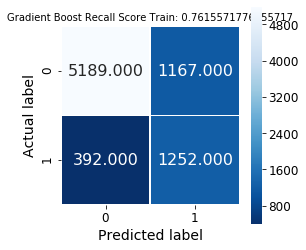

In [888]:
# Confusion matrix for Grid Gradient Boosting Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Gradient Boost Recall Score Train: {}'.format((recall_score(train_y, train_pred6)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'Gradient Boost Recall Score Val: 0.712468193384224')

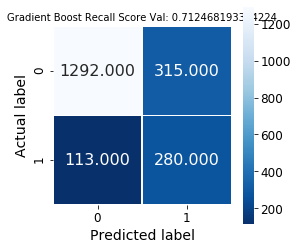

In [889]:
# Confusion matrix for Grid Gradient Boosting Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Gradient Boost Recall Score Val: {}'.format((recall_score(val_y, val_pred6)))
plt.title(all_sample_title, size = 10)

In [890]:
print("Train Accuracy",accuracy_score(train_y,train_pred6))
print("Train Recall",recall_score(train_y,train_pred6, pos_label=1))
print("Train Specificity",recall_score(train_y,train_pred6,pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred6))
print("Val Recall",recall_score(val_y, val_pred6, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred6,pos_label=0))

Train Accuracy 0.805125
Train Recall 0.7615571776155717
Train Specificity 0.8163939584644431
Val Accuracy 0.786
Val Recall 0.712468193384224
Val Specificity 0.8039825762289982


In [891]:
# Model Building
from xgboost.sklearn import XGBClassifier
xgb_grid = XGBClassifier(random_state=7)
xgb_param_grid = {"n_estimators" : [2,4,6,8,10],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
xgb1=RandomizedSearchCV(gbc_grid,gbc_param_grid,cv=10,scoring='recall',refit='recall',n_jobs=-1,n_iter=1000)
# Fitting
%time xgb1.fit(train_x, train_y)
print(xgb1.best_score_,xgb1.best_params_)

Wall time: 2min 15s
0.39411308203991124 {'n_estimators': 10, 'min_samples_leaf': 3, 'max_depth': 13}


In [892]:
# Predict
train_pred7 = xgb1.predict(train_x)
val_pred7 = xgb1.predict(val_x)

In [893]:
# Model evaluation
confusion_matrix_train7 = confusion_matrix(train_y, train_pred7)
confusion_matrix_val7 = confusion_matrix(val_y, val_pred7)

Text(0.5, 1, 'XG Boost Recall Score Train: 0.681265206812652')

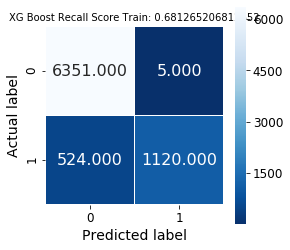

In [896]:
# Confusion matrix for Grid XGBoost Train
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_train7, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XG Boost Recall Score Train: {}'.format((recall_score(train_y, train_pred7)))
plt.title(all_sample_title, size = 10)

Text(0.5, 1, 'XG Boost Recall Score Val: 0.366412213740458')

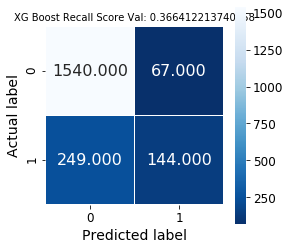

In [897]:
# Confusion matrix for Grid XGBoost Val
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_val7, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XG Boost Recall Score Val: {}'.format((recall_score(val_y, val_pred7)))
plt.title(all_sample_title, size = 10)

In [898]:
print("Train Accuracy",accuracy_score(train_y, train_pred7))
print("Train Recall",recall_score(train_y, train_pred7, pos_label=1))
print("Train Specificity",recall_score(train_y, train_pred7, pos_label=0))

print("Val Accuracy",accuracy_score(val_y,val_pred7))
print("Val Recall",recall_score(val_y, val_pred7, pos_label=1))
print("Val Specificity",recall_score(val_y, val_pred7,pos_label=0))

Train Accuracy 0.933875
Train Recall 0.681265206812652
Train Specificity 0.9992133417243549
Val Accuracy 0.842
Val Recall 0.366412213740458
Val Specificity 0.9583074051026758


In [899]:
# Making predictions on test data and uploading test restults
#test['Exited']=clf1.predict(test)
#test.loc[:,['CustomerID','Exited']].to_csv('Mith_Sub_1.csv',index=False)